In [1]:
# Import modules and R
import numpy as np, pandas as pd
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

In [7]:
import sys, os
sys.path.append('../code')
from processing_helpers import *
from analysis_helpers import *
from mri_maps import *
from gradientVersion import *
%R source("../code/Rplots.R");
%R source("../code/brainPlots.R");
%R source("../code/plot_maps.R");

## Get brainchart maps

In [18]:
brainchart = get_brainchart_maps().apply(lambda x: (x-np.mean(x))/np.std(x))

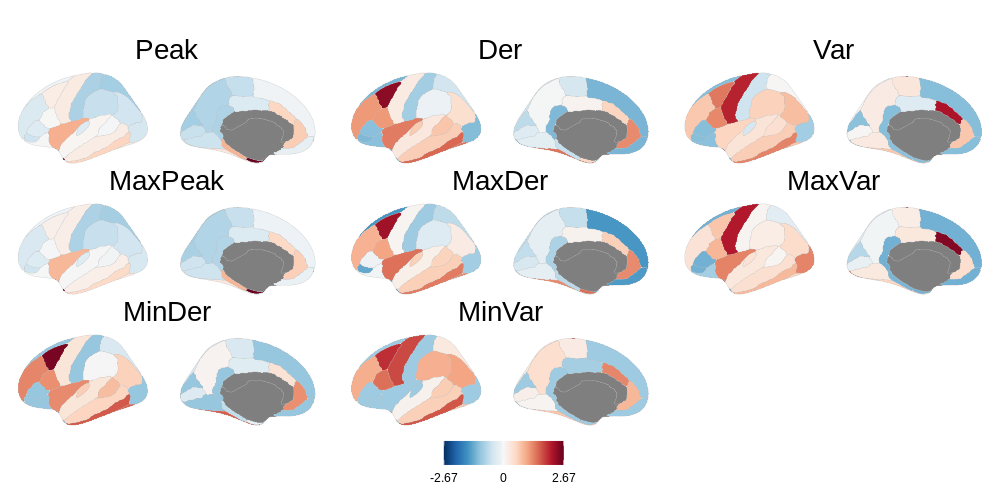

In [20]:
%%R -i brainchart -w 10 -h 5 --units in -r 100
plot_maps_dk(brainchart)

In [21]:
dm_hcp_ds9 = gradientVersion(approach='dm').fit('hcp_ds9')
dm_hcp_3d_ds5 = gradientVersion(approach='dm').fit('hcp_3donors_ds5')

New gradients version: method=dm, params={'alpha': 1}, kernel=normalized_angle, sparsity=0, data=hcp_ds9
New gradients version: method=dm, params={'alpha': 1}, kernel=normalized_angle, sparsity=0, data=hcp_3donors_ds5


In [35]:
dk_scores = dm_hcp_ds9.score_in_dk()

In [36]:
# dk_null_grads = np.load(f"../outputs/permutations/spin_gradients_dk_1000_dm_hcp_3d_ds5_vertices.npy")
dk_null_grads = np.load(f"../outputs/permutations/spin_gradients_dk_1000_dm_hcp_ds9_vertices.npy")

In [37]:
corrs = get_corrs(dk_scores, brainchart, method='spearman')
null_corrs = corr_nulls_from_grads(dk_null_grads, dk_scores, brainchart, method='spearman')
brainchart_null_p = get_null_p(corrs, null_corrs, adjust='fdr_bh').assign(map_name=lambda x: x['map'])

In [38]:
brainchart_null_p

,map,G,pct,true_mean,null_mean,null_std,z,pos,p,sig,q,map_name
0,Peak,G1,0.001,-0.718564,-0.001611,0.328675,-2.181344,False,0.002,True,0.0240,Peak
1,Peak,G2,0.354,-0.155080,0.008495,0.333242,-0.490861,False,0.708,False,0.9504,Peak
2,Peak,G3,0.620,0.097021,-0.005033,0.293475,0.347741,True,0.760,False,0.9504,Peak
3,MaxPeak,G1,0.001,-0.721620,-0.001895,0.328059,-2.193892,False,0.002,True,0.0240,MaxPeak
4,MaxPeak,G2,0.354,-0.154163,0.008271,0.332541,-0.488465,False,0.708,False,0.9504,MaxPeak
5,MaxPeak,G3,0.628,0.106494,-0.004896,0.293207,0.379900,True,0.744,False,0.9504,MaxPeak
6,MinDer,G1,0.207,-0.138306,0.005874,0.153336,-0.940288,False,0.414,False,0.9504,MinDer
7,MinDer,G2,0.729,0.109707,0.003273,0.159879,0.665716,True,0.542,False,0.9504,MinDer
8,MinDer,G3,0.222,-0.154715,0.001524,0.183632,-0.850823,False,0.444,False,0.9504,MinDer
10,Der,G2,0.503,0.007187,0.002452,0.165647,0.028580,True,0.994,False,0.9940,Der
